In [ ]:
# Importing the Libraries
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as nn
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
from textblob import TextBlob

In [ ]:
#uploading csv file
#the entire dataset is imported in CSV file
from google.colab import files
uploaded = files.upload()

Saving reddit_politics.csv to reddit_politics.csv


In [ ]:
#created dataframe
import io
dataframe = pd.read_csv(io.BytesIO(uploaded['reddit_politics.csv']))
dataframe.head()

,PullDate,text,id
0,2022-11-04,New UC Davis report shows “MAGA Republicans” m...,1
1,2022-11-04,"Youth Vote in 2022 Could Be Pivotal, If They T...",2
2,2022-11-04,Trump Freaks Out Republicans With Threat to An...,3
3,2022-11-04,Most Election Deniers Are Favored To Win Their...,4
4,2022-11-04,Ted Cruz hit with beer during Astros World Ser...,5


In [ ]:
dataframe.tail()

,PullDate,text,id
1213495,2022-11-22,Candidates highlight top issues in Jacksonvill...,1213496
1213496,2022-11-22,'I Will Not Stop Fighting': Omar Hits Back at ...,1213497
1213497,2022-11-22,Texas Guard to send 'tank-like' military vehic...,1213498
1213498,2022-11-22,The Massacre At Club Q Should Not Have Felt In...,1213499
1213499,2022-11-22,Officer’s suicide after Jan. 6 riot is a line-...,1213500


In [ ]:
# Iterating through the .csv data file and converting entire csv data into the text file
review_words= " "
for i in dataframe.text: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    review_words += " ".join(separate)+" "

In [ ]:
print(dataframe.text)

0          New UC Davis report shows “MAGA Republicans” m...
1          Youth Vote in 2022 Could Be Pivotal, If They T...
2          Trump Freaks Out Republicans With Threat to An...
3          Most Election Deniers Are Favored To Win Their...
4          Ted Cruz hit with beer during Astros World Ser...
                                 ...                        
1213495    Candidates highlight top issues in Jacksonvill...
1213496    'I Will Not Stop Fighting': Omar Hits Back at ...
1213497    Texas Guard to send 'tank-like' military vehic...
1213498    The Massacre At Club Q Should Not Have Felt In...
1213499    Officer’s suicide after Jan. 6 riot is a line-...
Name: text, Length: 1213500, dtype: object


In [ ]:
#creating stop-words and review_words
stop_words = set(STOPWORDS) 
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 4).generate(review_words) 

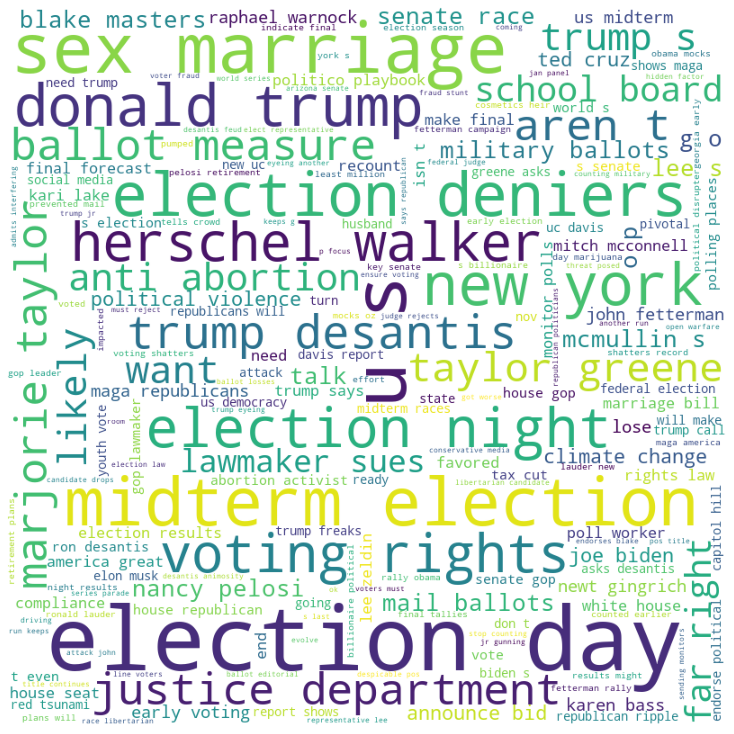

In [ ]:
# Plotting the WordCloud                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
def word_frequency(text):
    plt.figure(figsize=(8, 8))
    plt.xlabel('Word Length')
    plt.ylabel('Number of occurences')
    plt.title('Word Frequency Graph')
    plt.grid(True)
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

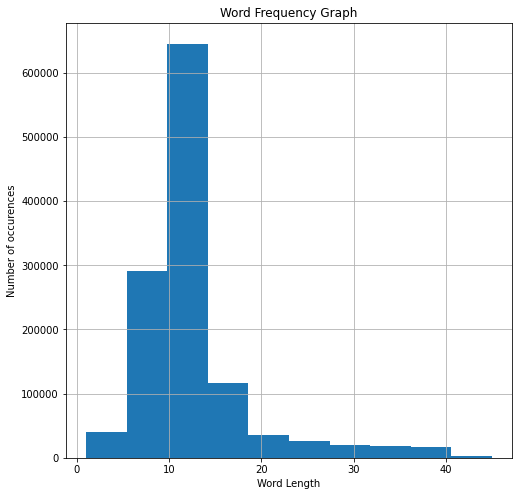

In [ ]:
word_frequency(dataframe['text'])

In [ ]:
def sentimental_score(text):
    
    def classification(text):
        return TextBlob(text).sentiment.polarity   
    polarity_score = text.apply(lambda x : classification(x))
    #print(polarity_score)
    plt.xlabel('Score range ')
    plt.ylabel('Number of occurences')
    plt.title('Sentimental Analysis Score')
    polarity_score.hist(color = "blue")

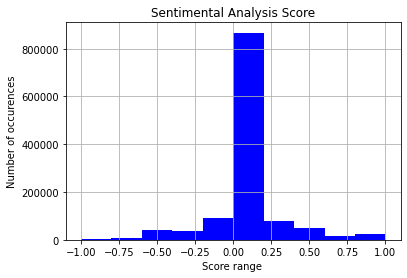

In [ ]:
sentimental_score(dataframe['text'])